# Regression in Python

***
This is a very quick run-through of some basic statistical concepts, adapted from [Lab 4 in Harvard's CS109](https://github.com/cs109/2015lab4) course. Please feel free to try the original lab if you're feeling ambitious :-) The CS109 git repository also has the solutions if you're stuck.

* Linear Regression Models
* Prediction using linear regression

Linear regression is used to model and predict continuous outcomes with normal random errors. There are nearly an infinite number of different types of regression models and each regression model is typically defined by the distribution of the prediction errors (called "residuals") of the type of data. Logistic regression is used to model binary outcomes whereas Poisson regression is used to predict counts. In this exercise, we'll see some examples of linear regression as well as Train-test splits.

The packages we'll cover are: `statsmodels`, `seaborn`, and `scikit-learn`. While we don't explicitly teach `statsmodels` and `seaborn` in the Springboard workshop, those are great libraries to know.
***

<img width=600 height=300 src="https://imgs.xkcd.com/comics/sustainable.png"/>
***

In [1]:
# special IPython command to prepare the notebook for matplotlib and other libraries
%matplotlib inline 

import numpy as np
import pandas as pd
import scipy.stats as stats
import matplotlib.pyplot as plt
import sklearn

import seaborn as sns

# special matplotlib argument for improved plots
from matplotlib import rcParams
sns.set_style("whitegrid")
sns.set_context("poster")


***
# Part 1: Introduction to Linear Regression
### Purpose of linear regression
***
<div class="span5 alert alert-info">

<p> Given a dataset containing predictor variables $X$ and outcome/response variable $Y$, linear regression can be used to: </p>
<ul>
  <li> Build a <b>predictive model</b> to predict future values of $\hat{Y}$, using new data $X^*$ where $Y$ is unknown.</li>
  <li> Model the <b>strength of the relationship</b> between each independent variable $X_i$ and $Y$</li>
    <ul>
      <li> Many times, only a subset of independent variables $X_i$ will have a linear relationship with $Y$</li>
      <li> Need to figure out which $X_i$ contributes most information to predict $Y$ </li>
    </ul>
   <li>It is in many cases, the first pass prediction algorithm for continuous outcomes. </li>
</ul>
</div>

### A Brief Mathematical Recap
***

[Linear Regression](http://en.wikipedia.org/wiki/Linear_regression) is a method to model the relationship between a set of independent variables $X$ (also knowns as explanatory variables, features, predictors) and a dependent variable $Y$.  This method assumes the relationship between each predictor $X$ is **linearly** related to the dependent variable $Y$. The most basic linear regression model contains one independent variable $X$, we'll call this the simple model. 

$$ Y = \beta_0 + \beta_1 X + \epsilon$$

where $\epsilon$ is considered as an unobservable random variable that adds noise to the linear relationship. In linear regression, $\epsilon$ is assumed to be normally distributed with a mean of 0. In other words, what this means is that on average, if we know $Y$, a roughly equal number of predictions $\hat{Y}$ will be above $Y$ and others will be below $Y$. That is, on average, the error is zero. The residuals, $\epsilon$ are also assumed to be "i.i.d.": independently and identically distributed. Independence means that the residuals are not correlated -- the residual from one prediction has no effect on the residual from another prediction. Correlated errors are common in time series analysis and spatial analyses.

* $\beta_0$ is the intercept of the linear model and represents the average of $Y$ when all independent variables $X$ are set to 0.

* $\beta_1$ is the slope of the line associated with the regression model and represents the average effect of a one-unit increase in $X$ on $Y$.

* Back to the simple model. The model in linear regression is the *conditional mean* of $Y$ given the values in $X$ is expressed a linear function.  

$$ y = f(x) = E(Y | X = x)$$ 

![conditional mean](images/conditionalmean.png)
*Image from http://www.learner.org/courses/againstallodds/about/glossary.html. Note this image uses $\alpha$ and $\beta$ instead of $\beta_0$ and $\beta_1$.*

* The goal is to estimate the coefficients (e.g. $\beta_0$ and $\beta_1$). We represent the estimates of the coefficients with a "hat" on top of the letter.  

$$ \hat{\beta}_0, \hat{\beta}_1 $$

* Once we estimate the coefficients $\hat{\beta}_0$ and $\hat{\beta}_1$, we can use these to predict new values of $Y$ given new data $X$.

$$\hat{y} = \hat{\beta}_0 + \hat{\beta}_1 x_1$$

* Multiple linear regression is when you have more than one independent variable and the estimation involves matrices
    * $X_1$, $X_2$, $X_3$, $\ldots$


* How do you estimate the coefficients? 
    * There are many ways to fit a linear regression model
    * The method called **least squares** is the most common methods
    * We will discuss least squares

$$ Y = \beta_0 + \beta_1 X_1 + \ldots + \beta_p X_p + \epsilon$$ 
    
### Estimating $\hat\beta$: Least squares
***
[Least squares](http://en.wikipedia.org/wiki/Least_squares) is a method that can estimate the coefficients of a linear model by minimizing the squared residuals: 

$$ \mathscr{L} = \sum_{i=1}^N \epsilon_i^2 = \sum_{i=1}^N \left( y_i - \hat{y}_i \right)^2  = \sum_{i=1}^N \left(y_i - \left(\beta_0 + \beta_1 x_i\right)\right)^2 $$

where $N$ is the number of observations and $\epsilon$ represents a residual or error, ACTUAL - PREDICTED.  

#### Estimating the intercept $\hat{\beta_0}$ for the simple linear model

We want to minimize the squared residuals and solve for $\hat{\beta_0}$ so we take the partial derivative of $\mathscr{L}$ with respect to $\hat{\beta_0}$ 

$
\begin{align}
\frac{\partial \mathscr{L}}{\partial \hat{\beta_0}} &= \frac{\partial}{\partial \hat{\beta_0}} \sum_{i=1}^N \epsilon^2 \\
&= \frac{\partial}{\partial \hat{\beta_0}} \sum_{i=1}^N \left( y_i - \hat{y}_i \right)^2 \\
&= \frac{\partial}{\partial \hat{\beta_0}} \sum_{i=1}^N \left( y_i - \left( \hat{\beta}_0 + \hat{\beta}_1 x_i \right) \right)^2 \\
&= -2 \sum_{i=1}^N \left( y_i - \left( \hat{\beta}_0 + \hat{\beta}_1 x_i \right) \right) \hspace{25mm} \mbox{(by chain rule)} \\
&= -2 \sum_{i=1}^N (y_i - \hat{\beta}_0 - \hat{\beta}_1 x_i) \\
&= -2 \left[ \left( \sum_{i=1}^N y_i \right) - N \hat{\beta_0} - \hat{\beta}_1 \left( \sum_{i=1}^N x_i
\right) \right] \\
& 2 \left[ N \hat{\beta}_0 + \hat{\beta}_1 \sum_{i=1}^N x_i - \sum_{i=1}^N y_i \right] = 0 \hspace{20mm} \mbox{(Set equal to 0 and solve for $\hat{\beta}_0$)} \\
& N \hat{\beta}_0 + \hat{\beta}_1 \sum_{i=1}^N x_i - \sum_{i=1}^N y_i = 0 \\
& N \hat{\beta}_0 = \sum_{i=1}^N y_i - \hat{\beta}_1 \sum_{i=1}^N x_i \\
& \hat{\beta}_0 = \frac{\sum_{i=1}^N y_i - \hat{\beta}_1 \sum_{i=1}^N x_i}{N} \\
& \hat{\beta}_0 = \frac{\sum_{i=1}^N y_i}{N} - \hat{\beta}_1 \frac{\sum_{i=1}^N x_i}{N} \\
& \boxed{\hat{\beta}_0 = \bar{y} - \hat{\beta}_1 \bar{x}}
\end{align}
$

Using this new information, we can compute the estimate for $\hat{\beta}_1$ by taking the partial derivative of $\mathscr{L}$ with respect to $\hat{\beta}_1$.

$
\begin{align}
\frac{\partial \mathscr{L}}{\partial \hat{\beta_1}} &= \frac{\partial}{\partial \hat{\beta_1}} \sum_{i=1}^N \epsilon^2 \\
&= \frac{\partial}{\partial \hat{\beta_1}} \sum_{i=1}^N \left( y_i - \hat{y}_i \right)^2 \\
&= \frac{\partial}{\partial \hat{\beta_1}} \sum_{i=1}^N \left( y_i - \left( \hat{\beta}_0 + \hat{\beta}_1 x_i \right) \right)^2 \\
&= 2 \sum_{i=1}^N \left( y_i - \left( \hat{\beta}_0 + \hat{\beta}_1 x_i \right) \right) \left( -x_i \right) \hspace{25mm}\mbox{(by chain rule)} \\
&= -2 \sum_{i=1}^N x_i \left( y_i - \hat{\beta}_0 - \hat{\beta}_1 x_i \right) \\
&= -2 \sum_{i=1}^N x_i (y_i - \hat{\beta}_0 x_i - \hat{\beta}_1 x_i^2) \\
&= -2 \sum_{i=1}^N x_i (y_i - \left( \bar{y} - \hat{\beta}_1 \bar{x} \right) x_i - \hat{\beta}_1 x_i^2) \\
&= -2 \sum_{i=1}^N (x_i y_i - \bar{y}x_i + \hat{\beta}_1\bar{x}x_i - \hat{\beta}_1 x_i^2) \\
&= -2 \left[ \sum_{i=1}^N x_i y_i - \bar{y} \sum_{i=1}^N x_i + \hat{\beta}_1\bar{x}\sum_{i=1}^N x_i - \hat{\beta}_1 \sum_{i=1}^N x_i^2 \right] \\
&= -2 \left[ \hat{\beta}_1 \left\{ \bar{x} \sum_{i=1}^N x_i - \sum_{i=1}^N x_i^2 \right\} + \left\{ \sum_{i=1}^N x_i y_i - \bar{y} \sum_{i=1}^N x_i \right\}\right] \\
& 2 \left[ \hat{\beta}_1 \left\{ \sum_{i=1}^N x_i^2 - \bar{x} \sum_{i=1}^N x_i \right\} + \left\{ \bar{y} \sum_{i=1}^N x_i - \sum_{i=1}^N x_i y_i \right\} \right] = 0 \\
& \hat{\beta}_1 = \frac{-\left( \bar{y} \sum_{i=1}^N x_i - \sum_{i=1}^N x_i y_i \right)}{\sum_{i=1}^N x_i^2 - \bar{x}\sum_{i=1}^N x_i} \\
&= \frac{\sum_{i=1}^N x_i y_i - \bar{y} \sum_{i=1}^N x_i}{\sum_{i=1}^N x_i^2 - \bar{x} \sum_{i=1}^N x_i} \\
& \boxed{\hat{\beta}_1 = \frac{\sum_{i=1}^N x_i y_i - \bar{x}\bar{y}n}{\sum_{i=1}^N x_i^2 - n \bar{x}^2}}
\end{align}
$

The solution can be written in compact matrix notation as

$$\hat\beta =  (X^T X)^{-1}X^T Y$$ 

We wanted to show you this in case you remember linear algebra, in order for this solution to exist we need $X^T X$ to be invertible. Of course this requires a few extra assumptions, $X$ must be full rank so that $X^T X$ is invertible, etc. Basically, $X^T X$ is full rank if all rows and columns are linearly independent. This has a loose relationship to variables and observations being independent respective. **This is important for us because this means that having redundant features in our regression models will lead to poorly fitting (and unstable) models.** We'll see an implementation of this in the extra linear regression example.

***
# Part 2: Exploratory Data Analysis for Linear Relationships

The [Boston Housing data set](https://archive.ics.uci.edu/ml/datasets/Housing) contains information about the housing values in suburbs of Boston.  This dataset was originally taken from the StatLib library which is maintained at Carnegie Mellon University and is now available on the UCI Machine Learning Repository. 


## Load the Boston Housing data set from `sklearn`
***

This data set is available in the [sklearn](http://scikit-learn.org/stable/modules/generated/sklearn.datasets.load_boston.html#sklearn.datasets.load_boston) python module which is how we will access it today.  

In [2]:
from sklearn.datasets import load_boston
import pandas as pd

boston = load_boston()

In [3]:
boston.keys()

dict_keys(['data', 'target', 'feature_names', 'DESCR', 'filename'])

In [4]:
boston.data.shape

(506, 13)

In [5]:
# Print column names
print(boston.feature_names)

['CRIM' 'ZN' 'INDUS' 'CHAS' 'NOX' 'RM' 'AGE' 'DIS' 'RAD' 'TAX' 'PTRATIO'
 'B' 'LSTAT']


In [6]:
# Print description of Boston housing data set
print(boston.DESCR)

.. _boston_dataset:

Boston house prices dataset
---------------------------

**Data Set Characteristics:**  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive. Median Value (attribute 14) is usually the target.

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of accessibility to radial highways
        - TAX      full-value property-tax rate per $10,000
        - PTRATIO  pu

Now let's explore the data set itself. 

In [7]:
bos = pd.DataFrame(boston.data)
bos.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33


There are no column names in the DataFrame. Let's add those. 

In [8]:
bos.columns = boston.feature_names
bos.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33


Now we have a pandas DataFrame called `bos` containing all the data we want to use to predict Boston Housing prices.  Let's create a variable called `PRICE` which will contain the prices. This information is contained in the `target` data. 

In [9]:
print(boston.target.shape)

(506,)


In [10]:
bos['PRICE'] = boston.target
bos.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,PRICE
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


## EDA and Summary Statistics
***

Let's explore this data set.  First we use `describe()` to get basic summary statistics for each of the columns. 

In [11]:
bos.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,PRICE
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063,22.532806
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000,17.025000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000,21.200000
75%,3.677083,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


### Scatterplots
***

Let's look at some scatter plots for three variables: 'CRIM' (per capita crime rate), 'RM' (number of rooms) and 'PTRATIO' (pupil-to-teacher ratio in schools).  

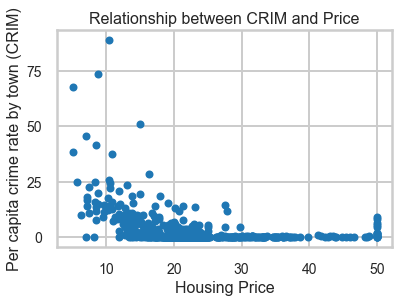

In [12]:
plot=plt.scatter(bos.PRICE,bos.CRIM, marker='.')
plt.ylabel("Per capita crime rate by town (CRIM)",fontsize = 16)
plt.xlabel("Housing Price",fontsize = 16)
plt.title("Relationship between CRIM and Price",fontsize = 16)
# ticklabels
plt.setp(plot.axes.get_xticklabels(), fontsize=14) # x ticklabels
plt.setp(plot.axes.get_yticklabels(), fontsize=14) # y ticklabels

plt.show()

<div class="span5 alert alert-info">
<h3>Part 2 Checkup Exercise Set I</h3>

<p><b>Exercise:</b> What kind of relationship do you see? e.g. positive, negative?  linear? non-linear? Is there anything else strange or interesting about the data? What about outliers?</p>


<p><b>Exercise:</b> Create scatter plots between *RM* and *PRICE*, and *PTRATIO* and *PRICE*. Label your axes appropriately using human readable labels. Tell a story about what you see.</p>

<p><b>Exercise:</b> What are some other numeric variables of interest? Why do you think they are interesting? Plot scatterplots with these variables and *PRICE* (house price) and tell a story about what you see.</p>

</div>

**Part 2.1, Exercise 1:**

*-- What kind of relationship do you see?*

The range in housing price is much wider where there is less crime. The crime rate drops as housing price rises between 15 and 20 (thousand) and drops to near 0 for prices > 30, with a small bump at 50.

The corelation is negative but not obviously linear.

*--Is there anything else strange or interesting about the data?*

The data appears to have been artificially capped at Price 50,000

**Part 2.1, Exercise 2:**

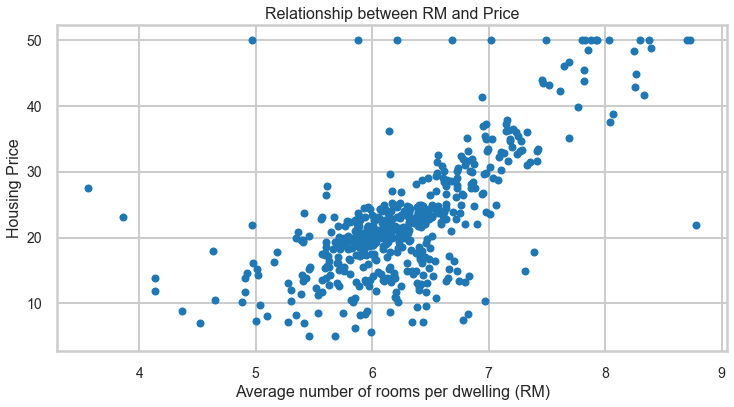

In [13]:
# Scatter plot between *RM* and *PRICE*

plt.figure(figsize=(12,6))
plot=plt.scatter(bos.RM, bos.PRICE,marker='.')
plt.xlabel("Average number of rooms per dwelling (RM)",fontsize=16)
plt.ylabel("Housing Price",fontsize=16)
plt.title("Relationship between RM and Price",fontsize=16)

plt.setp(plot.axes.get_xticklabels(), fontsize=14)
plt.setp(plot.axes.get_yticklabels(), fontsize=14)

plt.show()

There seems to be a clear positive correlation between number of rooms and housing price. As the number of rooms increases, so does the price, barring a few outliers. For example, two mid-priced houses are claimed to have have fewer than 4 rooms(!).

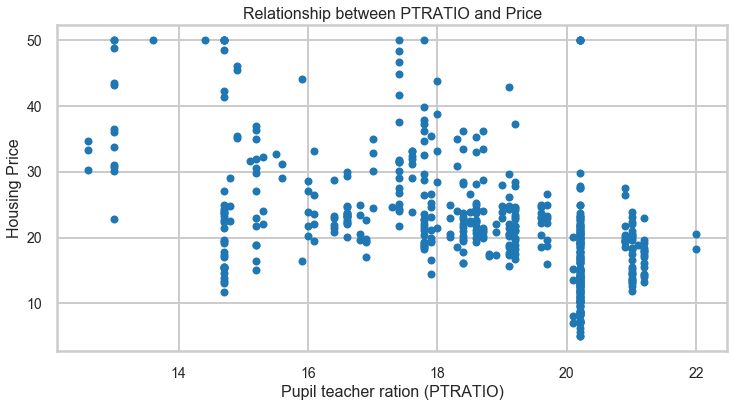

In [14]:
# Scatter plot between *PTRATIO* and *PRICE*

plt.figure(figsize=(12,6))
plot=plt.scatter(bos.PTRATIO, bos.PRICE,marker='.')
plt.xlabel("Pupil teacher ration (PTRATIO)",fontsize=16)
plt.ylabel("Housing Price",fontsize=16)
plt.title("Relationship between PTRATIO and Price",fontsize=16)

plt.setp(plot.axes.get_xticklabels(), fontsize=14)
plt.setp(plot.axes.get_yticklabels(), fontsize=14)

plt.show()

There seems to be no correlation between pupil:teacher ratio and housing price, except to note that there seem to be no houses in the lowest price range where PTRATIO is less than 14:1. Then again, the difference between a 14:1 ratio and a 22:1 ratio isn't that great.

**Part 2.1, Exercise 3:**


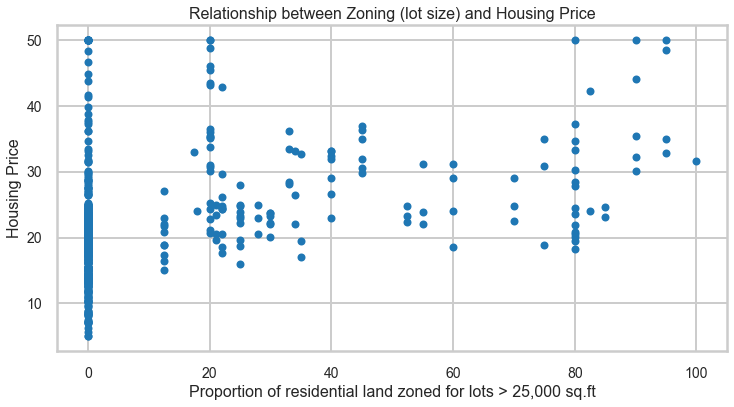

In [15]:
# ZN: proportion of residential land zoned for lots over 25,000 sq.ft.
plt.figure(figsize=(12,6))
plot = plt.scatter(bos.ZN, bos.PRICE, marker='.')
plt.xlabel("Proportion of residential land zoned for lots > 25,000 sq.ft", fontsize=16)
plt.ylabel("Housing Price", fontsize=16)
plt.title("Relationship between Zoning (lot size) and Housing Price", fontsize=16)
# ticklabels
plt.setp(plot.axes.get_xticklabels(), fontsize=14) # x ticklabels
plt.setp(plot.axes.get_yticklabels(), fontsize=14) # y ticklabels

plt.show()

Housing price doesn't seem to be nearly as correlated to lot size as I would have guessed. Perhaps many of the areas with a larger proportion of half acre (or more) zoning are older construction or farther from a major city center.

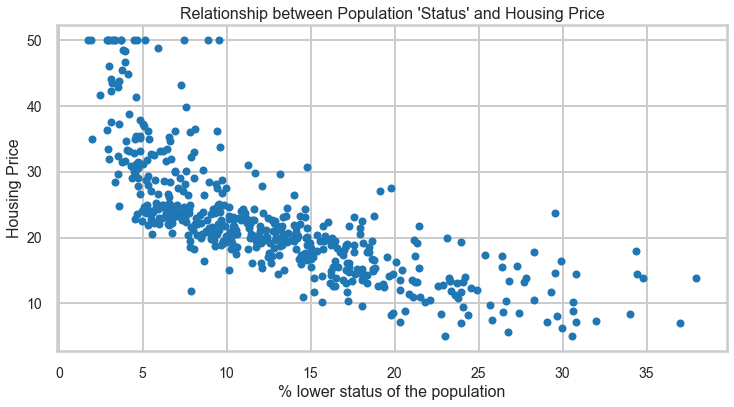

In [16]:

plt.figure(figsize=(12,6))
plot = plt.scatter(bos.LSTAT, bos.PRICE, marker='.')
plt.xlabel("% lower status of the population", fontsize=16)
plt.ylabel("Housing Price", fontsize=16)
plt.title("Relationship between Population 'Status' and Housing Price", fontsize=16)
# ticklabels
plt.setp(plot.axes.get_xticklabels(), fontsize=14) # x ticklabels
plt.setp(plot.axes.get_yticklabels(), fontsize=14) # y ticklabels

plt.show()

Assuming that "lower status of the population" means "poorer people", it's not surprising that there would be a negative correlation between this feature and housing price. Poorer people tend to live in cheaper housing and vice versa.

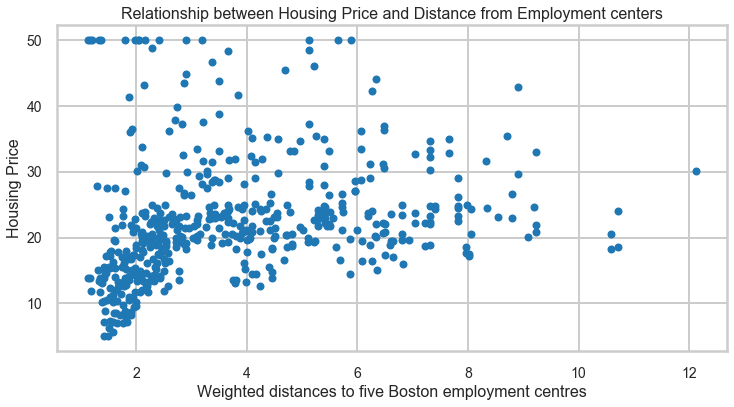

In [17]:
plt.figure(figsize=(12,6))
plot = plt.scatter(bos.DIS, bos.PRICE, marker='.')
plt.xlabel("Weighted distances to five Boston employment centres", fontsize=16)
plt.ylabel("Housing Price", fontsize=16)
plt.title("Relationship between Housing Price and Distance from Employment centers", fontsize=16 )

# ticklabels
plt.setp(plot.axes.get_xticklabels(), fontsize=14) # x ticklabels
plt.setp(plot.axes.get_yticklabels(), fontsize=14) # y ticklabels

plt.show()


There seems to be a positive correlation between housing price and distance to employment centers, at the lower end of the price range, with lower-priced housing units being much closr to employment centers.

Surprisingly, the most expensive housing units are also closer to the employment centers. Perhaps these are much older units?

### Scatterplots using Seaborn
***

[Seaborn](https://stanford.edu/~mwaskom/software/seaborn/) is a cool Python plotting library built on top of matplotlib. It provides convenient syntax and shortcuts for many common types of plots, along with better-looking defaults.

We can also use [seaborn regplot](https://stanford.edu/~mwaskom/software/seaborn/tutorial/regression.html#functions-to-draw-linear-regression-models) for the scatterplot above. This provides automatic linear regression fits (useful for data exploration later on). Here's one example below.

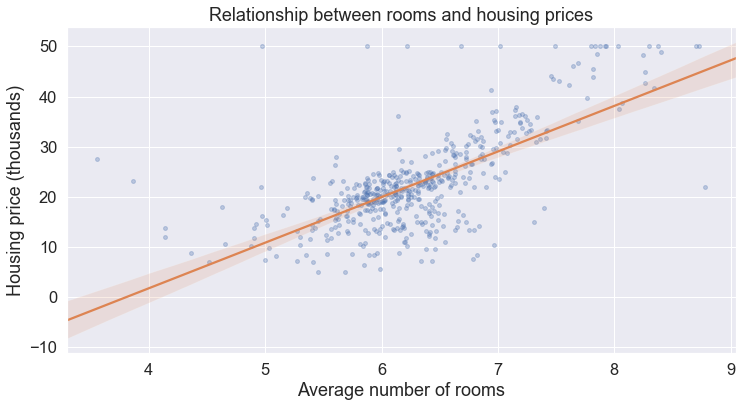

In [18]:
sns.set(font_scale = 1.5)
f = sns.regplot(y="PRICE", x="RM", data=bos, fit_reg = True, marker=".",
                scatter_kws={'color': 'C0', 'alpha':0.3, 's':60}, 
                line_kws={'color': 'C1'}
               )
f.figure.set_size_inches(12, 6)
plt.xlabel("Average number of rooms")
plt.ylabel("Housing price (thousands)")
plt.title("Relationship between rooms and housing prices")

plt.show()

### Histograms
***


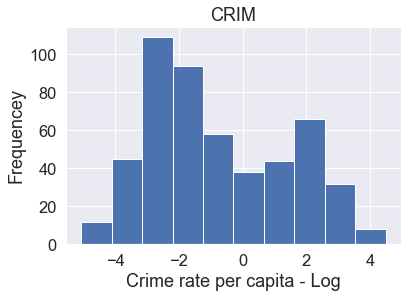

In [19]:
plt.hist(np.log(bos.CRIM))
plt.title("CRIM")
plt.xlabel("Crime rate per capita - Log")
plt.ylabel("Frequencey")
plt.show()

<div class="span5 alert alert-info">
<h3>Part 2 Checkup Exercise Set II</h3>

<p><b>Exercise:</b> In the above histogram, we took the logarithm of the crime rate per capita. Repeat this histogram without taking the log. What was the purpose of taking the log? What do we gain by making this transformation? What do you now notice about this variable that is not obvious without making the transformation?

<p><b>Exercise:</b> Plot the histogram for *RM* and *PTRATIO* against each other, along with the two variables you picked in the previous section. We are looking for correlations in predictors here.</p>
</div>

**Part 2.2, Exercise 1:**

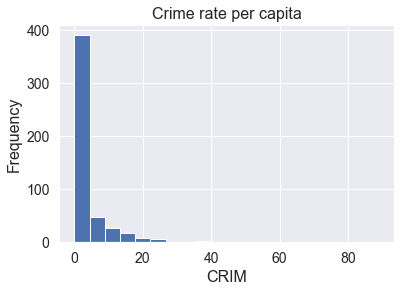

In [20]:
plt.hist(bos.CRIM, bins=20)
plt.title("Crime rate per capita", fontsize=16)
plt.xlabel("CRIM", fontsize=16)
plt.ylabel("Frequency", fontsize=16)
plt.xticks(size = 14)
plt.yticks(size = 14)

plt.show()

<span style="color:red">What was the purpose of taking the log? What do we gain by making this transformation?</span>

There is one data point above 80 (88), one at approximately 50, and two between 60 and 80. Most of the data is between 0 and 20, but the handful of values above 20 throw off the histogram. When we use a log scale, that handful fades into the background.

We also see what appears to be a bimodal distribution.

<span style="color:red">What do you now notice about this variable that is not obvious without making the transformation?</span>

The average crime rate is pretty low, less than 10 crimes per capita. That's harder to see with the log scale.

Also, without the log scale, it's clear that the maximum is higher than 80, even though the histogram doesn't show what those values are. The log plot at least indicates that there are values higher than 20.

**Part 2.2, Exercise 2:**


Instead of randomly picking two variables to compare, why not just compare all of them in a scatter matrix? Then, if we want to, we can take a closer look at any pairs with an interesting relationship.

The first time I ran this, I used all variables. However, CHAS doesn't add anything useful to the plot, so I removed that one.

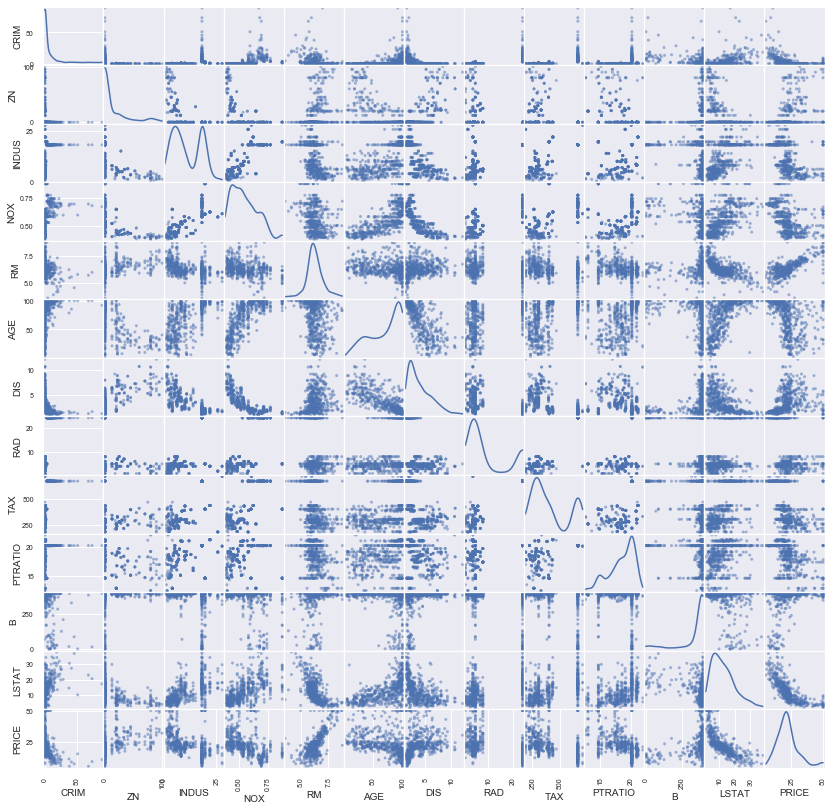

In [21]:
from pandas.plotting import scatter_matrix

# CHAS wasn't useful; removed.
df = bos[['CRIM', 'ZN', 'INDUS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX', 'PTRATIO',
 'B', 'LSTAT', 'PRICE']]

Axes = scatter_matrix(df, figsize=(14, 14), diagonal='kde')
#y ticklabels
[plt.setp(item.yaxis.get_majorticklabels(), 'size', 7) for item in Axes.ravel()]
#x ticklabels
[plt.setp(item.xaxis.get_majorticklabels(), 'size', 7) for item in Axes.ravel()]

#y labels
[plt.setp(item.yaxis.get_label(), 'size', 10) for item in Axes.ravel()]
#x labels
[plt.setp(item.xaxis.get_label(), 'size', 10) for item in Axes.ravel()]

plt.show()


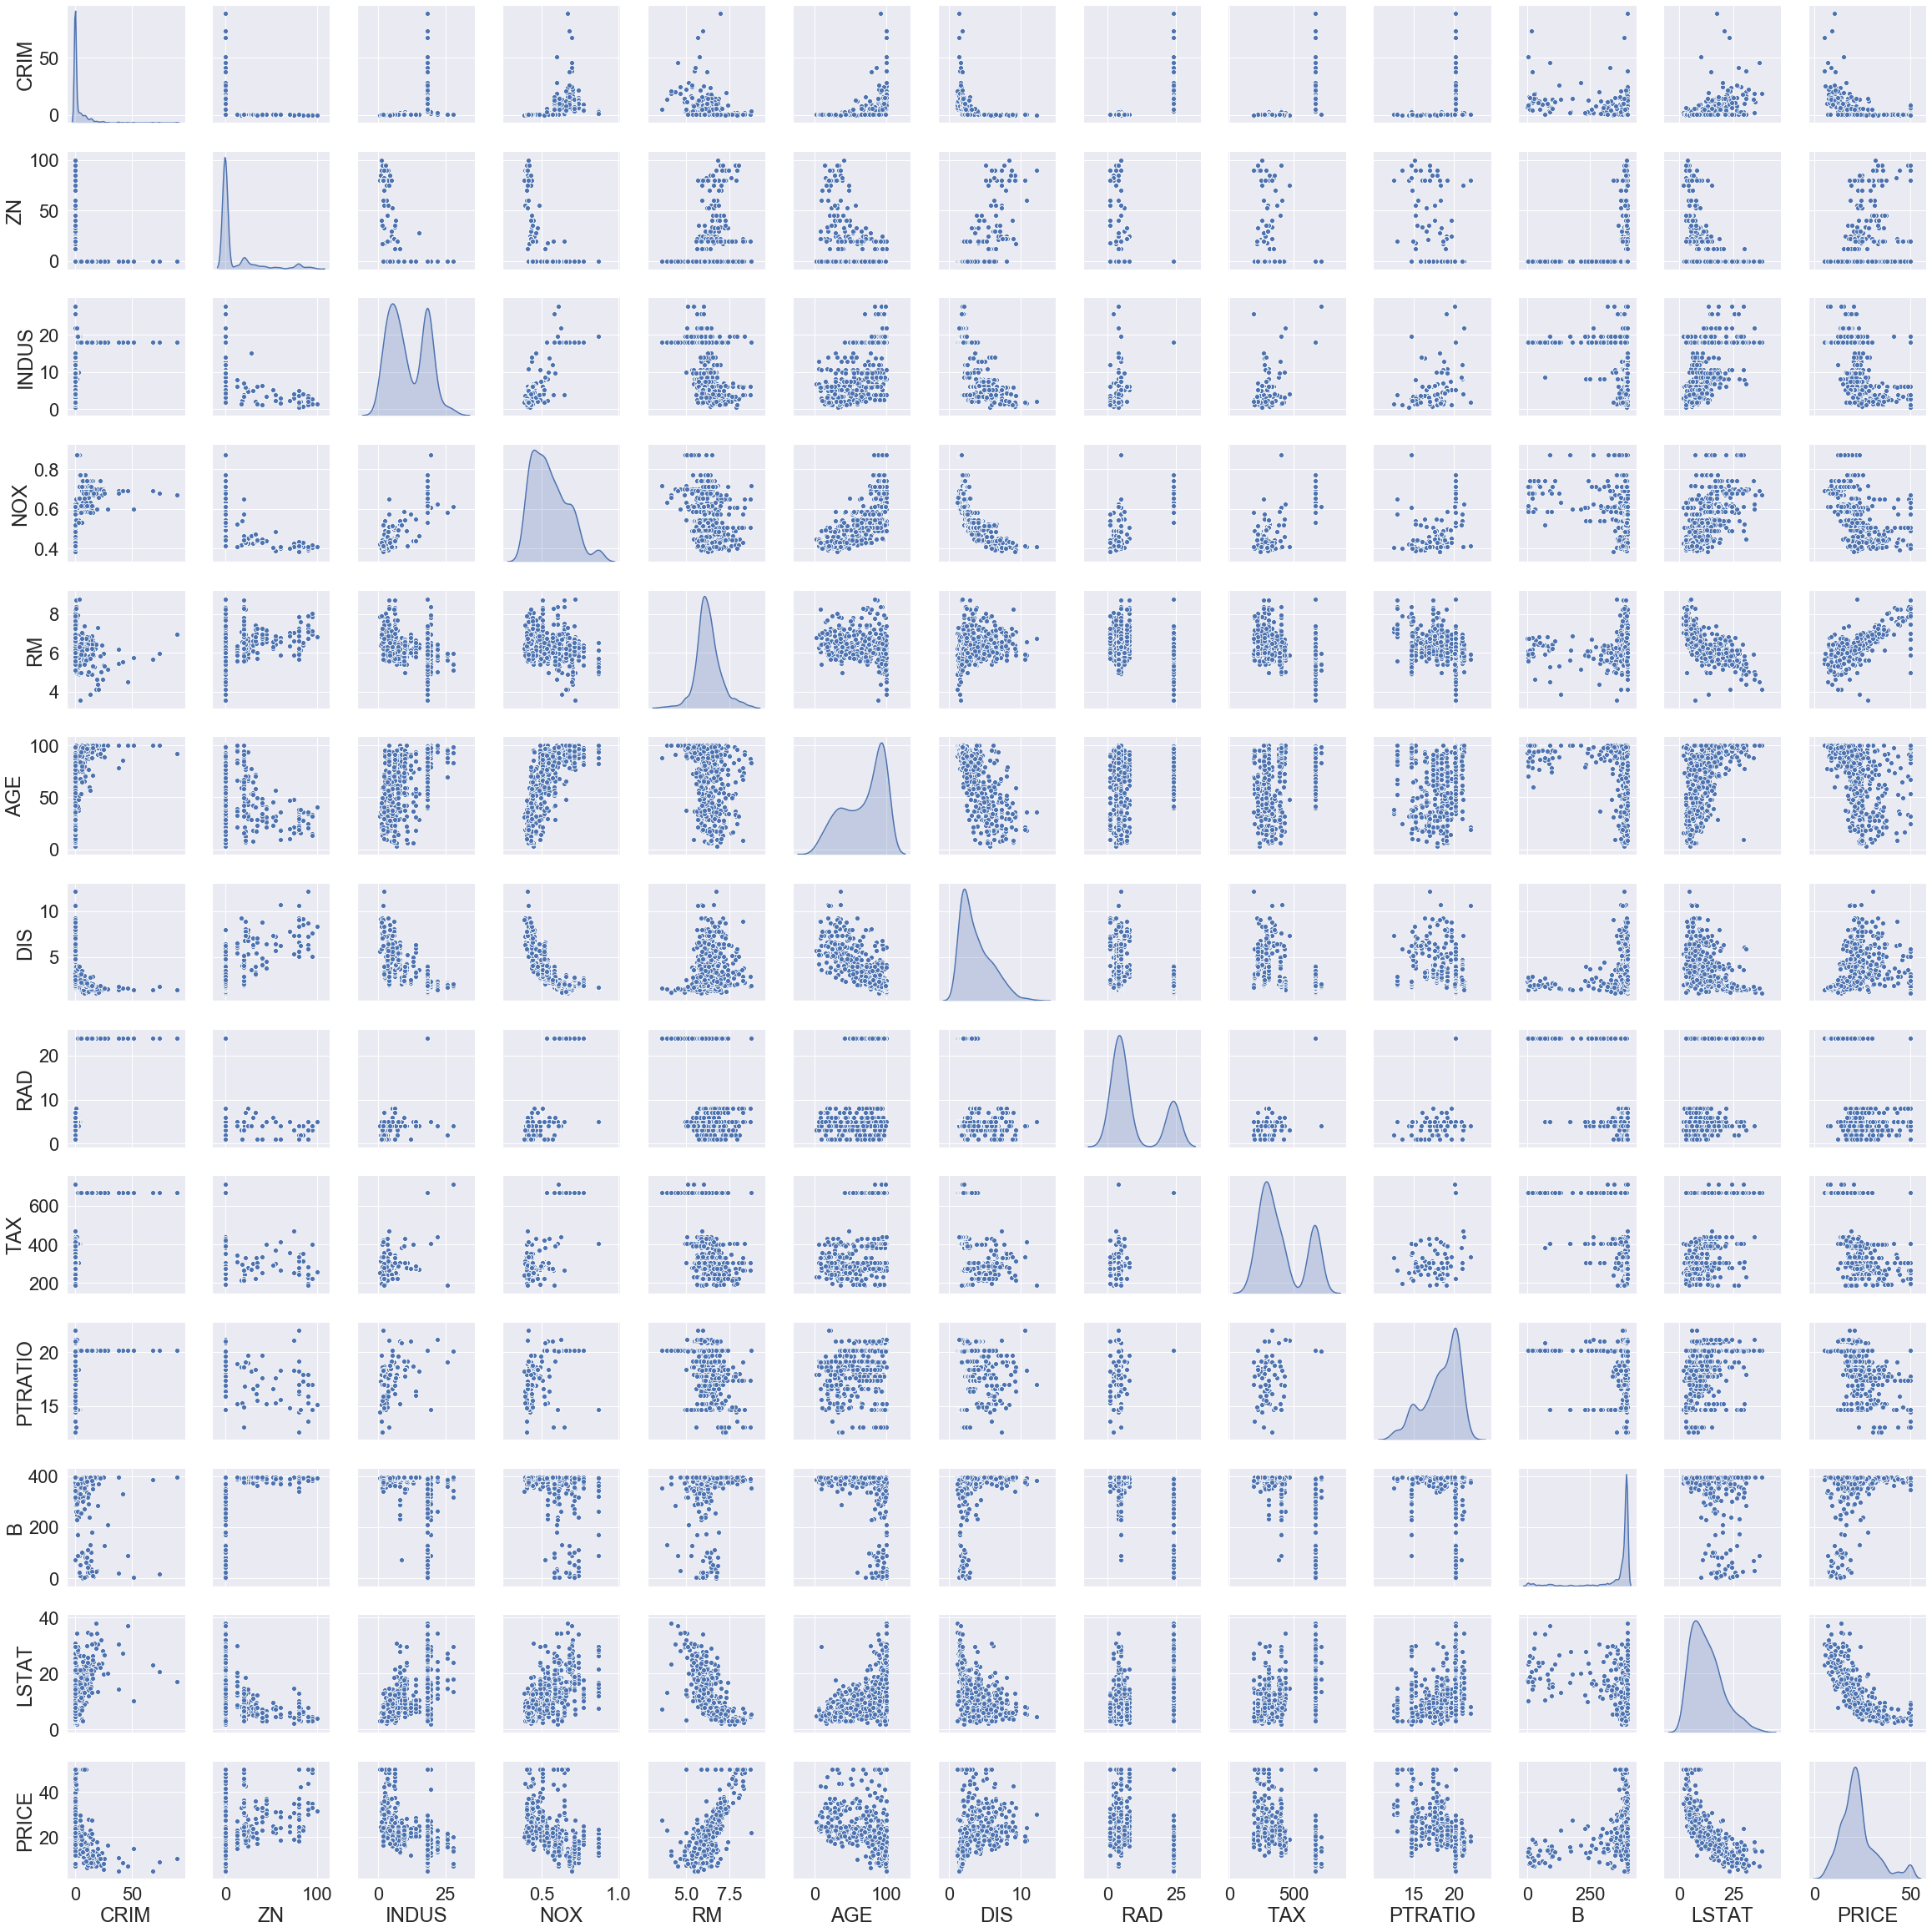

In [22]:
with sns.plotting_context("notebook", font_scale=2):
    grid = sns.pairplot(bos, vars=['CRIM', 'ZN', 'INDUS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX', 'PTRATIO',
 'B', 'LSTAT', 'PRICE'], diag_kind='kde')

plt.tight_layout()
plt.show();

## Part 3: Linear Regression with Boston Housing Data Example
***

Here, 

$Y$ = boston housing prices (called "target" data in python, and referred to as the dependent variable or response variable)

and

$X$ = all the other features (or independent variables, predictors or explanatory variables)

which we will use to fit a linear regression model and predict Boston housing prices. We will use the least-squares method to estimate the coefficients.  

We'll use two ways of fitting a linear regression. We recommend the first but the second is also powerful in its features.

### Fitting Linear Regression using `statsmodels`
***
[Statsmodels](http://statsmodels.sourceforge.net/) is a great Python library for a lot of basic and inferential statistics. It also provides basic regression functions using an R-like syntax, so it's commonly used by statisticians. While we don't cover statsmodels officially in the Data Science Intensive workshop, it's a good library to have in your toolbox. Here's a quick example of what you could do with it. The version of least-squares we will use in statsmodels is called *ordinary least-squares (OLS)*. There are many other versions of least-squares such as [partial least squares (PLS)](https://en.wikipedia.org/wiki/Partial_least_squares_regression) and [weighted least squares (WLS)](https://en.wikipedia.org/wiki/Iteratively_reweighted_least_squares).

In [23]:
# Import regression modules
import statsmodels.api as sm
from statsmodels.formula.api import ols

In [24]:
# statsmodels works nicely with pandas dataframes
# The thing inside the "quotes" is called a formula, a bit on that below
m = ols('PRICE ~ RM',bos).fit()
print(m.summary())

                            OLS Regression Results                            
Dep. Variable:                  PRICE   R-squared:                       0.484
Model:                            OLS   Adj. R-squared:                  0.483
Method:                 Least Squares   F-statistic:                     471.8
Date:                Mon, 25 Nov 2019   Prob (F-statistic):           2.49e-74
Time:                        10:27:21   Log-Likelihood:                -1673.1
No. Observations:                 506   AIC:                             3350.
Df Residuals:                     504   BIC:                             3359.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    -34.6706      2.650    -13.084      0.0

#### Interpreting coefficients

There is a ton of information in this output. But we'll concentrate on the coefficient table (middle table). We can interpret the `RM` coefficient (9.1021) by first noticing that the p-value (under `P>|t|`) is so small, basically zero. This means that the number of rooms, `RM`, is a statisticall significant predictor of `PRICE`. The regression coefficient for `RM` of 9.1021 means that *on average, each additional room is associated with an increase of $\$9,100$ in house price net of the other variables*. The confidence interval gives us a range of plausible values for this average change, about ($\$8,279, \$9,925$), definitely not chump change. 

In general, the $\hat{\beta_i}, i > 0$ can be interpreted as the following: "A one unit increase in $x_i$ is associated with, on average, a $\hat{\beta_i}$ increase/decrease in $y$ net of all other variables."

On the other hand, the interpretation for the intercept, $\hat{\beta}_0$ is the average of $y$ given that all of the independent variables $x_i$ are 0.

####  `statsmodels` formulas
***
This formula notation will seem familiar to `R` users, but will take some getting used to for people coming from other languages or are new to statistics.

The formula gives instruction for a general structure for a regression call. For `statsmodels` (`ols` or `logit`) calls you need to have a Pandas dataframe with column names that you will add to your formula. In the below example you need a pandas data frame that includes the columns named (`Outcome`, `X1`,`X2`, ...), but you don't need to build a new dataframe for every regression. Use the same dataframe with all these things in it. The structure is very simple:

`Outcome ~ X1`

But of course we want to to be able to handle more complex models, for example multiple regression is doone like this:

`Outcome ~ X1 + X2 + X3`

In general, a formula for an OLS multiple linear regression is

`Y ~ X1 + X2 + ... + Xp`

This is the very basic structure but it should be enough to get you through the homework. Things can get much more complex. You can force statsmodels to treat variables as categorical with the `C()` function, call numpy functions to transform data such as `np.log` for extremely-skewed data, or fit a model without an intercept by including `- 1` in the formula. For a quick run-down of further uses see the `statsmodels` [help page](http://statsmodels.sourceforge.net/devel/example_formulas.html).


Let's see how our model actually fit our data. We can see below that there is a ceiling effect, we should probably look into that. Also, for large values of $Y$ we get underpredictions, most predictions are below the 45-degree gridlines. 

<div class="span5 alert alert-info">
<h3>Part 3 Checkup Exercise Set I</h3>

<p><b>Exercise:</b> Create a scatterplot between the predicted prices, available in `m.fittedvalues` (where `m` is the fitted model) and the original prices. How does the plot look? Do you notice anything interesting or weird in the plot? Comment on what you see.</p>
</div>

**Part 3.1, Exercise 1:**

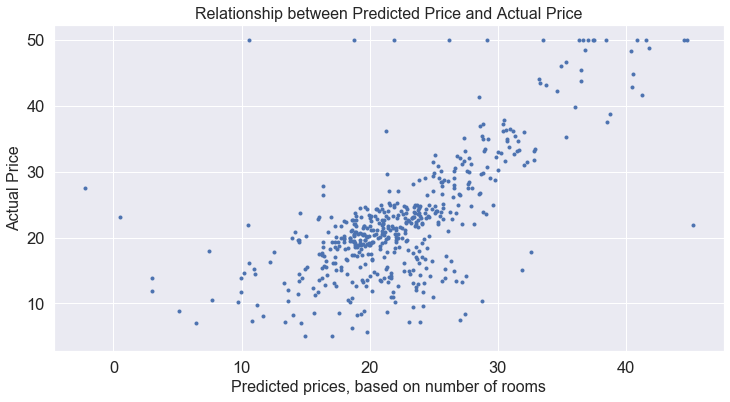

In [25]:
# your turn
plt.figure(figsize=(12,6))
plot = plt.scatter(m.fittedvalues, bos.PRICE, marker='.')
plt.xlabel("Predicted prices, based on number of rooms", fontsize=16)
plt.ylabel("Actual Price", fontsize=16)
plt.title("Relationship between Predicted Price and Actual Price", fontsize=16 )

plt.show()

There's a positive correlation between predicted and observed prices. This is as expected.

There are some strange outliers. For example, several of the highest observed prices fall where the predicted price would be much lower.

### Fitting Linear Regression using `sklearn`


In [26]:
from sklearn.linear_model import LinearRegression
X = bos.drop('PRICE', axis = 1)

# This creates a LinearRegression object
lm = LinearRegression()
lm

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

#### What can you do with a LinearRegression object? 
***
Check out the scikit-learn [docs here](http://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html). We have listed the main functions here. Most machine learning models in scikit-learn follow this same API of fitting a model with `fit`, making predictions with `predict` and the appropriate scoring function `score` for each model.

Main functions | Description
--- | --- 
`lm.fit()` | Fit a linear model
`lm.predit()` | Predict Y using the linear model with estimated coefficients
`lm.score()` | Returns the coefficient of determination (R^2). *A measure of how well observed outcomes are replicated by the model, as the proportion of total variation of outcomes explained by the model*

#### What output can you get?

In [ ]:
# Look inside lm object
# lm.<tab>

Output | Description
--- | --- 
`lm.coef_` | Estimated coefficients
`lm.intercept_` | Estimated intercept 

### Fit a linear model
***

The `lm.fit()` function estimates the coefficients the linear regression using least squares. 

In [27]:
# Use all 13 predictors to fit linear regression model
lm.fit(X, bos.PRICE)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [28]:
lm.coef_

array([-1.08011358e-01,  4.64204584e-02,  2.05586264e-02,  2.68673382e+00,
       -1.77666112e+01,  3.80986521e+00,  6.92224640e-04, -1.47556685e+00,
        3.06049479e-01, -1.23345939e-02, -9.52747232e-01,  9.31168327e-03,
       -5.24758378e-01])

In [29]:
lm.intercept_

36.45948838509015

<div class="span5 alert alert-info">
<h3>Part 3 Checkup Exercise Set II</h3>

<p><b>Exercise:</b> How would you change the model to not fit an intercept term? Would you recommend not having an intercept? Why or why not? For more information on why to include or exclude an intercept, look [here](https://stats.idre.ucla.edu/other/mult-pkg/faq/general/faq-what-is-regression-through-the-origin/).</p>

<p><b>Exercise:</b> One of the assumptions of the linear model is that the residuals must be i.i.d. (independently and identically distributed). To satisfy this, is it enough that the residuals are normally distributed? Explain your answer.</p>

<p><b>Exercise:</b> True or false. To use linear regression, $Y$ must be normally distributed. Explain your answer.</p>
</div>


**Part 3.2, Exercise 1:**

In [30]:
lm2=LinearRegression(fit_intercept=False)
lm2

LinearRegression(copy_X=True, fit_intercept=False, n_jobs=None, normalize=False)

<span style="color:red">Would you recommend not having an intercept? Why or why not?/<span>

It depends on the data. If x==0, should y also == 0?

In the case of housing prices, we're attempting to fit 13 predictors. The intercept comes out at 36. I would leave this alone. With 13 predictors in play, I don't think we can say, with any accuracy, that y should be 0 if X == 0. Some of the factors are negatively correlated; some are positively correlated and some have no correlation. I wouldn't even set the intercept to 0 when looking at rooms vs price; A "house" with 0 rooms, is a vacant lot, and we know those sell for a lot more than $0.

**Part 3.2, Exercise 3:**

False.

"There are NO assumptions in any linear model about the distribution of the independent variables.

### Estimated intercept and coefficients

Let's look at the estimated coefficients from the linear model using `1m.intercept_` and `lm.coef_`.  

After we have fit our linear regression model using the least squares method, we want to see what are the estimates of our coefficients $\beta_0$, $\beta_1$, ..., $\beta_{13}$: 

$$ \hat{\beta}_0, \hat{\beta}_1, \ldots, \hat{\beta}_{13} $$



In [31]:
print('Estimated intercept coefficient: {}'.format(lm.intercept_))

Estimated intercept coefficient: 36.45948838509015


In [32]:
print('Number of coefficients: {}'.format(len(lm.coef_)))

Number of coefficients: 13


In [33]:
# The coefficients
pd.DataFrame({'features': X.columns, 'estimatedCoefficients': lm.coef_})[['features', 'estimatedCoefficients']]

,features,estimatedCoefficients
0,CRIM,-0.108011
1,ZN,0.046420
2,INDUS,0.020559
3,CHAS,2.686734
4,NOX,-17.766611
5,RM,3.809865
6,AGE,0.000692
7,DIS,-1.475567
8,RAD,0.306049
9,TAX,-0.012335


### Predict Prices 

We can calculate the predicted prices ($\hat{Y}_i$) using `lm.predict`. 

$$ \hat{Y}_i = \hat{\beta}_0 + \hat{\beta}_1 X_1 + \ldots \hat{\beta}_{13} X_{13} $$

In [34]:
# first five predicted prices
lm.predict(X)[0:5]

array([30.00384338, 25.02556238, 30.56759672, 28.60703649, 27.94352423])

<div class="span5 alert alert-info">
<h3>Part 3 Checkup Exercise Set III</h3>

<p><b>Exercise:</b> Histogram: Plot a histogram of all the predicted prices. Write a story about what you see. Describe the shape, center and spread of the distribution. Are there any outliers? What might be the reason for them? Should we do anything special with them?</p>

<p><b>Exercise:</b> Scatterplot: Let's plot the true prices compared to the predicted prices to see they disagree (we did this with `statsmodels` before).</p>

<p><b>Exercise:</b> We have looked at fitting a linear model in both `statsmodels` and `scikit-learn`. What are the advantages and disadvantages of each based on your exploration? Based on the information provided by both packages, what advantage does `statsmodels` provide?</p>
</div>

**Part 3.3, Exercise 1:**

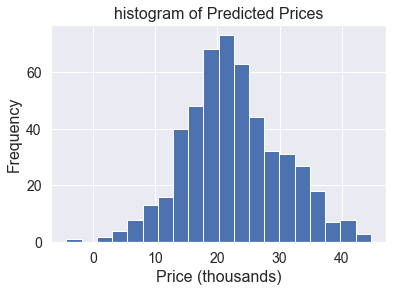

In [35]:
pred = lm.predict(X)

plt.hist(pred, bins=20)
plt.title("histogram of Predicted Prices", fontsize=16)
plt.xlabel("Price (thousands)", fontsize=16)
plt.ylabel("Frequency", fontsize=16)
plt.xticks(size = 14)
plt.yticks(size = 14)

plt.show()

In [36]:
bos['PRED_PRICE']=pred

bos['PRED_PRICE'].describe()

count    506.000000
mean      22.532806
std        7.915083
min       -4.281311
25%       17.445740
50%       22.118653
75%       27.410022
max       44.673083
Name: PRED_PRICE, dtype: float64

The shape is very close to being a bell curve, with a center at 22.5; the spread runs from 0 to 44.7 . It's a nice nearly-normal curve, except for a weird outlier at less than 0 (the minimum predicted value is -4.28).

This isn't logical. We should either remove that one or figure out what caused it (and then remove it, and possibly not use that attribute in our predictions).

Also odd, the maximum predicted value is only 44.67. Our 50 thousand dollar houses are considered "outliers" by the prediction model.

**Part 3.3, Exercise 2:**

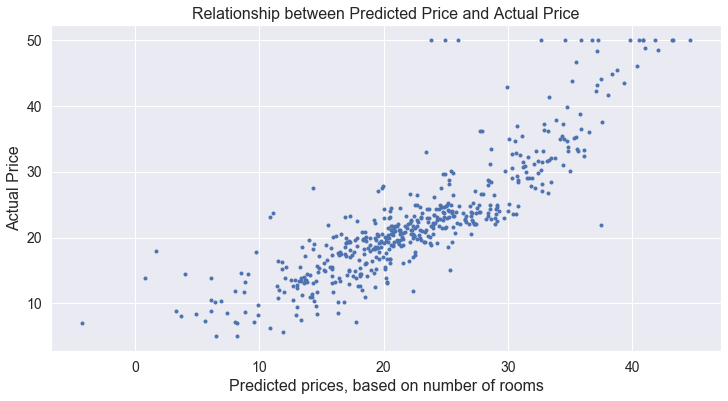

In [37]:

plt.figure(figsize=(12,6))
plot = plt.scatter(bos.PRED_PRICE, bos.PRICE, marker='.')
plt.xlabel("Predicted prices, based on number of rooms", fontsize=16)
plt.ylabel("Actual Price", fontsize=16)
plt.title("Relationship between Predicted Price and Actual Price", fontsize=16 )

# ticklabels
plt.setp(plot.axes.get_xticklabels(), fontsize=14) # x ticklabels
plt.setp(plot.axes.get_yticklabels(), fontsize=14) # y ticklabels

plt.show()

This set of predictions is better. The observed prices at 50 are closer to the upper end of the prediction, not the lower end.

<span style="color:red">**Part 3.3, Exercise 3:**<span>

### Evaluating the Model: Sum-of-Squares

The partitioning of the sum-of-squares shows the variance in the predictions explained by the model and the variance that is attributed to error.

$$TSS = ESS + RSS$$

#### Residual Sum-of-Squares (aka $RSS$)

The residual sum-of-squares is one of the basic ways of quantifying how much error exists in the fitted model. We will revisit this in a bit.

$$ RSS = \sum_{i=1}^N r_i^2 = \sum_{i=1}^N \left(y_i - \left(\beta_0 + \beta_1 x_i\right)\right)^2 $$

In [38]:
print(np.sum((bos.PRICE - lm.predict(X)) ** 2))

11078.784577954977


#### Explained Sum-of-Squares (aka $ESS$)

The explained sum-of-squares measures the variance explained by the regression model.

$$ESS = \sum_{i=1}^N \left( \hat{y}_i - \bar{y} \right)^2 = \sum_{i=1}^N \left( \left( \hat{\beta}_0 + \hat{\beta}_1 x_i \right) - \bar{y} \right)^2$$

In [39]:
print(np.sum((lm.predict(X) - np.mean(bos.PRICE)) ** 2))

31637.510837065056


### Evaluating the Model: The Coefficient of Determination ($R^2$)

The coefficient of determination, $R^2$, tells us the percentage of the variance in the response variable $Y$ that can be explained by the linear regression model.

$$ R^2 = \frac{ESS}{TSS} $$

The $R^2$ value is one of the most common metrics that people use in describing the quality of a model, but it is important to note that *$R^2$ increases artificially as a side-effect of increasing the number of independent variables.* While $R^2$ is reported in almost all statistical packages, another metric called the *adjusted $R^2$* is also provided as it takes into account the number of variables in the model, and can sometimes even be used for non-linear regression models!

$$R_{adj}^2 = 1 - \left( 1 - R^2 \right) \frac{N - 1}{N - K - 1} = R^2 - \left( 1 - R^2 \right) \frac{K}{N - K - 1} = 1 - \frac{\frac{RSS}{DF_R}}{\frac{TSS}{DF_T}}$$

where $N$ is the number of observations, $K$ is the number of variables, $DF_R = N - K - 1$ is the degrees of freedom associated with the residual error and $DF_T = N - 1$ is the degrees of the freedom of the total error.

### Evaluating the Model: Mean Squared Error and the $F$-Statistic
***
The mean squared errors are just the *averages* of the sum-of-squares errors over their respective degrees of freedom.

$$MSE = \frac{RSS}{N-K-1}$$

$$MSR = \frac{ESS}{K}$$

**Remember:** Notation may vary across resources particularly the use of $R$ and $E$ in $RSS/ESS$ and $MSR/MSE$. In some resources, E = explained and R = residual. In other resources, E = error and R = regression (explained). **This is a very important distinction that requires looking at the formula to determine which naming scheme is being used.**

Given the MSR and MSE, we can now determine whether or not the entire model we just fit is even statistically significant. We use an $F$-test for this. The null hypothesis is that all of the $\beta$ coefficients are zero, that is, none of them have any effect on $Y$. The alternative is that *at least one* $\beta$ coefficient is nonzero, but it doesn't tell us which one in a multiple regression:

$$H_0: \beta_i = 0, \mbox{for all $i$} \\
H_A: \beta_i > 0, \mbox{for some $i$}$$ 

$$F = \frac{MSR}{MSE} = \left( \frac{R^2}{1 - R^2} \right) \left( \frac{N - K - 1}{K} \right)$$
 
Once we compute the $F$-statistic, we can use the $F$-distribution with $N-K$ and $K-1$ degrees of degrees of freedom to get a p-value.

**Warning!** The $F$-statistic mentioned in this section is NOT the same as the F1-measure or F1-value discused in Unit 7.

<div class="span5 alert alert-info">
<h3>Part 3 Checkup Exercise Set IV</h3>

<p>Let's look at the relationship between `PTRATIO` and housing price.</p>

<p><b>Exercise:</b> Try fitting a linear regression model using only the 'PTRATIO' (pupil-teacher ratio by town) and interpret the intercept and the coefficients.</p>

<p><b>Exercise:</b> Calculate (or extract) the $R^2$ value. What does it tell you?</p>

<p><b>Exercise:</b> Compute the $F$-statistic. What does it tell you?</p>

<p><b>Exercise:</b> Take a close look at the $F$-statistic and the $t$-statistic for the regression coefficient. What relationship do you notice? Note that this relationship only applies in *simple* linear regression models.</p>
</div>

**Part 3.4, Exercise 1:**

In [40]:
# Note: if you fit linear regression for one feature the error will be very high. 

# From above:
# X = bos.drop('PRICE', axis = 1)
# lm = LinearRegression()

lm.fit(X[['PTRATIO']],bos.PRICE)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [41]:
lm.coef_

array([-2.1571753])

In [42]:
lm.intercept_

62.34462747483265


The (only) coefficient is negative so the correlation is negative.

The intercept is 62.345 This implies that the median housing price would be  $62,345 when the pupil:teacher ratio was 0.

**Part 3.4, Exercise 2:**

In [43]:
from sklearn.metrics import r2_score
# r2_score(y_true, y_pred)
r2 = r2_score(bos.PRICE, lm.predict(X[['PTRATIO']]))
print("R^2:", r2 )

R^2: 0.257847318009223


$R^2$ is a statistic that will give some information about the goodness of fit of a model. In regression, the $R^2$ coefficient of determination is a statistical measure of how well the regression predictions approximate the real data points. An $R^2$ of 1 indicates that the regression predictions perfectly fit the data." [ref](https://en.wikipedia.org/wiki/Coefficient_of_determination)

The coefficient of determination... is interpreted as the proportion of the variance in the dependent variable that is predictable from the independent variable.

An $R^2$ of 0 means that the dependent variable cannot be predicted from the independent variable.
An $R^2$ of 1 means the dependent variable can be predicted without error from the independent variable.
An $R^2$ between 0 and 1 indicates the extent to which the dependent variable is predictable. An R^2 of 0.10 means that 10 percent of the variance in Y is predictable from X; an $R^2$ of 0.20 means that 20 percent is predictable; and so on.
[ref](https://stattrek.com/statistics/dictionary.aspx?definition=coefficient_of_determination)

"The $R^2$ value represents how well the model accounts for all of the data. It can only take on values between 0 and 1. It is the percentage of the deviation of the points in the dataset that the model can explain." [ref](https://stats.stackexchange.com/questions/256726/linear-regression-what-does-the-f-statistic-r-squared-and-residual-standard-err)

Thus, an $R^2$ of 0.26 indicates a less than perfect fit; only 26% of the variance in housing prices is predictable from pupil:teacher ratio.

**Part 3.4, Exercise 3:**

"The F value is the ratio of the mean regression sum of squares divided by the mean error sum of squares. Its value will range from zero to an arbitrarily large number." [ref](https://stats.stackexchange.com/tags/f-statistic/info)

"The F ratio is the ratio of two mean square values. If the null hypothesis is true, you expect F to have a value close to 1.0 most of the time. A large F ratio means that the variation among group means is more than you'd expect to see by chance. "

"The F-test of overall significance indicates whether your linear regression model provides a better fit to the data than a model that contains no independent variables. ... R-squared tells you how well your model fits the data, and the F-test is related to it." [ref](https://statisticsbyjim.com/regression/interpret-f-test-overall-significance-regression/)


F = MSR / MSE = ($R^2$/(1-$R^2$)) ((N-K-1)/K)


Were k is the number of comparison groups. In our case it is 1

In [44]:
# N is the number of observations, K is the number of variables
N = len(bos)
K = 1

f_stat = (r2/(1 - r2)) * ((N - K - 1)/K)
print("F-statistic:", f_stat) 

F-statistic: 175.10554287569548


<span style="color:red">**What does it tell you**<span>

In [45]:
##### Using statsmodel
# Try fitting a linear regression model using only the 'PTRATIO' (pupil-teacher ratio by town) 
m2 = ols('PRICE ~ PTRATIO', bos).fit()
m2.summary()

print('R^2:', m2.rsquared)
print('F-statistic:', m2.fvalue)
print('F-pvalue', m2.f_pvalue)

R^2: 0.257847318009223
F-statistic: 175.1055428756955
F-pvalue 1.6095094784729786e-34


<div class="span5 alert alert-info">
<h3>Part 3 Checkup Exercise Set V</h3>

<p>Fit a linear regression model using three independent variables</p>

<ol>
<li> 'CRIM' (per capita crime rate by town)
<li> 'RM' (average number of rooms per dwelling)
<li> 'PTRATIO' (pupil-teacher ratio by town)
</ol>

<p><b>Exercise:</b> Compute or extract the $F$-statistic. What does it tell you about the model?</p>

<p><b>Exercise:</b> Compute or extract the $R^2$ statistic. What does it tell you about the model?</p>

<p><b>Exercise:</b> Which variables in the model are significant in predicting house price? Write a story that interprets the coefficients.</p>
</div>

In [46]:
# Fit a linear regression model using three independent variables:
# CRIM, RM, PTRATIO

m3 = ols('PRICE ~ CRIM + RM + PTRATIO', bos).fit()
m3.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  PRICE   R-squared:                       0.594
Model:                            OLS   Adj. R-squared:                  0.592
Method:                 Least Squares   F-statistic:                     245.2
Date:                Mon, 25 Nov 2019   Prob (F-statistic):           6.15e-98
Time:                        10:31:39   Log-Likelihood:                -1612.0
No. Observations:                 506   AIC:                             3232.
Df Residuals:                     502   BIC:                             3249.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -3.3707      4.034     -0.836      0.404     -11.296       4.555
CRIM          -0.2050      0.032     -6.399      0.000      -0.268      -0.142
RM             7.3804      0.402     18.382      0.000       6.592       8.169
PTRATIO       -1.0695      0.133     -8.051      0.000      -1.331      -0.809
==============================================================================
Omnibus:                      234.656   Durbin-Watson:                   0.830
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             2020.689
Skew:                           1.815   Prob(JB):                         0.00
Kurtosis:                      12.092   Cond. No.                         311.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

**Part 3.5, Exercise 1,2:**

In [47]:
# Extract the F -statistic. 
print('F-statistic:', m3.fvalue)
print('F-pvalue', m3.f_pvalue)

# Extract the  R^2  statistic.
print('R^2:', m3.rsquared)

F-statistic: 245.1644903006464
F-pvalue 6.150435026236667e-98
R^2: 0.5943412940723473


**What does the F-statistic tell you about the model?**

A large F-ratio indicates that there is a relationship. 245 is larger than 175, so using all three factors provides a better model.

**What does $R^2$ tell you about the model?**

$R^2$ indicates how strong that relationship is. This model predicts 60% of the variance in housing prices. It's more than twice as good as the previous model.

**Part 3.5, Exercise 3:**

In this model, the most significant variable is RM (number of rooms). The coefficient is 7.3804. For every additional room, the model predicts a 7380 increase in median price.

The next most significant variable is PTRATIO. As pupil:teacher ratio decreases, the median price of housing in that area increases slightly (by 1070 for each reduction in PTRATIO). That's not much of a predictor.

## Part 4: Comparing Models

During modeling, there will be times when we want to compare models to see which one is more predictive or fits the data better. There are many ways to compare models, but we will focus on two.

### The $F$-Statistic Revisited

The $F$-statistic can also be used to compare two *nested* models, that is, two models trained on the same dataset where one of the models contains a *subset* of the variables of the other model. The *full* model contains $K$ variables and the *reduced* model contains a subset of these $K$ variables. This allows us to add additional variables to a base model and then test if adding the variables helped the model fit.

$$F = \frac{\left( \frac{RSS_{reduced} - RSS_{full}}{DF_{reduced} - DF_{full}} \right)}{\left( \frac{RSS_{full}}{DF_{full}} \right)}$$

where $DF_x = N - K_x - 1$ where $K_x$ is the number of variables in model $x$.

### Akaike Information Criterion (AIC)

Another statistic for comparing two models is AIC, which is based on the likelihood function and takes into account the number of variables in the model.

$$AIC = 2 K - 2 \log_e{L}$$

where $L$ is the likelihood of the model. AIC is meaningless in the absolute sense, and is only meaningful when compared to AIC values from other models. Lower values of AIC indicate better fitting models.

`statsmodels` provides the AIC in its output.

<div class="span5 alert alert-info">
<h3>Part 4 Checkup Exercises</h3>

<p><b>Exercise:</b> Find another variable (or two) to add to the model we built in Part 3. Compute the $F$-test comparing the two models as well as the AIC. Which model is better?</p>
</div>

In [48]:
# Add LSTAT and DIS to the model
m4 = ols('PRICE ~ CRIM + RM + PTRATIO + LSTAT + DIS', bos).fit()
m4.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  PRICE   R-squared:                       0.696
Model:                            OLS   Adj. R-squared:                  0.693
Method:                 Least Squares   F-statistic:                     228.7
Date:                Mon, 25 Nov 2019   Prob (F-statistic):          1.10e-126
Time:                        10:31:47   Log-Likelihood:                -1539.2
No. Observations:                 506   AIC:                             3090.
Df Residuals:                     500   BIC:                             3116.
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     22.8945      4.080      5.611      0.000      14.879      30.910
CRIM          -0.0918      0.031     -2.998      0.003      -0.152      -0.032
RM             4.3326      0.422     10.266      0.000       3.503       5.162
PTRATIO       -0.9214      0.116     -7.914      0.000      -1.150      -0.693
LSTAT         -0.6244      0.048    -12.911      0.000      -0.719      -0.529
DIS           -0.6201      0.128     -4.845      0.000      -0.872      -0.369
==============================================================================
Omnibus:                      182.594   Durbin-Watson:                   0.960
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              810.523
Skew:                           1.561   Prob(JB):                    9.93e-177
Kurtosis:                       8.357   Cond. No.                         442.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

**Compute the F -test comparing the two models as well as the AIC. Which model is better?**

In [49]:
# Compute the F -test comparing the two models
rss_reduced = m3.ssr
rss_full = m4.ssr
df_reduced = m3.df_resid
df_full = m4.df_resid
f = ((rss_reduced - rss_full)/(df_reduced - df_full))/(rss_full/df_full)
print('F-statistic is:', f)

# extract AIC's
print("AIC - reduced:", m3.aic, "\nAIC - full:", m4.aic)
print("AIC (Difference):", (m3.aic - m4.aic))

F-statistic is: 83.35415426764423
AIC - reduced: 3231.9451235449956 
AIC - full: 3090.3463896931744
AIC (Difference): 141.59873385182118



**Which model is better?**

Adding DIS and LSTAT results in a more accurate model:

F-statisic has decreased but is still quite large.

$R^2$ has increased to 0.696; these features explain more of the variance in median housing prices.

AIC has decreased by 142 points. "Lower values of AIC indicate better fitting models".


## Part 5: Evaluating the Model via Model Assumptions and Other Issues
***
Linear regression makes several assumptions. It is always best to check that these assumptions are valid after fitting a linear regression model.

<div class="span5 alert alert-danger">
<ul>
  <li>**Linearity**. The dependent variable $Y$ is a linear combination of the regression coefficients and the independent variables $X$. This can be verified with a scatterplot of each $X$ vs. $Y$ and plotting correlations among $X$. Nonlinearity can sometimes be resolved by [transforming](https://onlinecourses.science.psu.edu/stat501/node/318) one or more independent variables, the dependent variable, or both. In other cases, a [generalized linear model](https://en.wikipedia.org/wiki/Generalized_linear_model) or a [nonlinear model](https://en.wikipedia.org/wiki/Nonlinear_regression) may be warranted.</li>
  <li>**Constant standard deviation**. The SD of the dependent variable $Y$ should be constant for different values of X. We can check this by plotting each $X$ against $Y$ and verifying that there is no "funnel" shape showing data points fanning out as $X$ increases or decreases. Some techniques for dealing with non-constant variance include weighted least squares (WLS), [robust standard errors](https://en.wikipedia.org/wiki/Heteroscedasticity-consistent_standard_errors), or variance stabilizing transformations.
    </li>
  <li> **Normal distribution for errors**.  The $\epsilon$ term we discussed at the beginning are assumed to be normally distributed. This can be verified with a fitted values vs. residuals plot and verifying that there is no pattern, and with a quantile plot.
  $$ \epsilon_i \sim N(0, \sigma^2)$$
Sometimes the distributions of responses $Y$ may not be normally distributed at any given value of $X$.  e.g. skewed positively or negatively. </li>
<li> **Independent errors**.  The observations are assumed to be obtained independently.
    <ul>
        <li>e.g. Observations across time may be correlated
    </ul>
</li>
</ul>  

</div>

There are some other issues that are important investigate with linear regression models.

<div class="span5 alert alert-danger">
<ul>
  <li>**Correlated Predictors:** Care should be taken to make sure that the independent variables in a regression model are not too highly correlated. Correlated predictors typically do not majorly affect prediction, but do inflate standard errors of coefficients making interpretation unreliable. Common solutions are dropping the least important variables involved in the correlations, using regularlization, or, when many predictors are highly correlated, considering a dimension reduction technique such as principal component analysis (PCA).
  <li>**Influential Points:** Data points that have undue influence on the regression model. These points can be high leverage points or outliers. Such points are typically removed and the regression model rerun.
</ul>
</div>


<div class="span5 alert alert-info">
<h3>Part 5 Checkup Exercises</h3>

<p>Take the reduced model from Part 3 to answer the following exercises. Take a look at [this blog post](http://mpastell.com/2013/04/19/python_regression/) for more information on using statsmodels to construct these plots.</p>
    
<p><b>Exercise:</b> Construct a fitted values versus residuals plot. What does the plot tell you? Are there any violations of the model assumptions?</p>

<p><b>Exercise:</b> Construct a quantile plot of the residuals. What does the plot tell you?</p>

<p><b>Exercise:</b> What are some advantages and disadvantages of the fitted vs. residual and quantile plot compared to each other?</p>

<p><b>Exercise:</b> Identify any outliers (if any) in your model and write a story describing what these outliers might represent.</p>

<p><b>Exercise:</b> Construct a leverage plot and identify high leverage points in the model. Write a story explaining possible reasons for the high leverage points.</p>

<p><b>Exercise:</b> Remove the outliers and high leverage points from your model and run the regression again. How do the results change?</p>
</div>

In [50]:
# Fit a linear regression model using three independent variables:
# CRIM, RM, PTRATIO

m3 = ols('PRICE ~ CRIM + RM + PTRATIO', bos).fit()
m3.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  PRICE   R-squared:                       0.594
Model:                            OLS   Adj. R-squared:                  0.592
Method:                 Least Squares   F-statistic:                     245.2
Date:                Mon, 25 Nov 2019   Prob (F-statistic):           6.15e-98
Time:                        10:33:12   Log-Likelihood:                -1612.0
No. Observations:                 506   AIC:                             3232.
Df Residuals:                     502   BIC:                             3249.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -3.3707      4.034     -0.836      0.404     -11.296       4.555
CRIM          -0.2050      0.032     -6.399      0.000      -0.268      -0.142
RM             7.3804      0.402     18.382      0.000       6.592       8.169
PTRATIO       -1.0695      0.133     -8.051      0.000      -1.331      -0.809
==============================================================================
Omnibus:                      234.656   Durbin-Watson:                   0.830
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             2020.689
Skew:                           1.815   Prob(JB):                         0.00
Kurtosis:                      12.092   Cond. No.                         311.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

**Part 5, Exercise 1:**  Construct a fitted values versus residuals plot. What does the plot tell you? Are there any violations of the model assumptions?

When conducting a residual analysis, a "residuals versus fits plot" is the most frequently created plot. It is a scatter plot of residuals on the y axis and fitted values (estimated responses) on the x axis. The plot is used to detect non-linearity, unequal error variances, and outliers.[ref](https://newonlinecourses.science.psu.edu/stat462/node/117/)

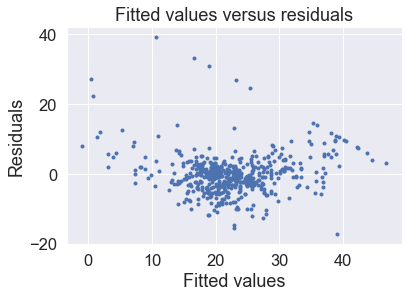

In [51]:
plt.scatter(m3.fittedvalues, m3.resid, marker='.')
plt.xlabel('Fitted values'b)
plt.ylabel('Residuals')
plt.title('Fitted values versus residuals')

plt.show()

**Here are the characteristics of a well-behaved residual vs. fits plot and what they suggest about the appropriateness of the simple linear regression model:**

The residuals "bounce randomly" around the 0 line. This suggests that the assumption that the relationship is linear is reasonable.

The residuals roughly form a "horizontal band" around the 0 line. This suggests that the variances of the error terms are equal.

No one residual "stands out" from the basic random pattern of residuals. This suggests that there are no outliers.

**What does the plot tell you?** - This is a reasonably well-behaved residual vs. fits plot, suggesting that the model is adequate.

**Are there any violations of the model assumptions?**

The residuals should "bounce randomly" around the 0 line. - largely true

The residuals should roughly form a "horizontal band" around the 0 line. - True in the center, but failing at both ends

No one residual should "stand out" from the basic random pattern of residuals. - False
There are 7 points that stand out.

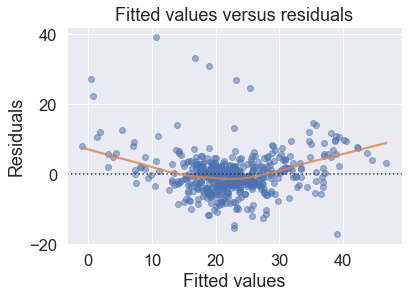

In [52]:
# Seaborn includes the center line 
sns.residplot(m3.fittedvalues, m3.resid, 
              data=bos, 
              lowess=True, 
              scatter_kws={'color': 'C0', 'alpha': 0.5},
              line_kws={'color': 'C1', 'alpha': 0.8});
plt.xlabel('Fitted values')
plt.ylabel('Residuals')
plt.title('Fitted values versus residuals')
plt.show()

"The residuals should roughly form a "horizontal band" around the 0 line".

This plot shows that the residuals do not meet the "horizontal band" assumption at the ends. The plot curves up, above the 0 line.

**Part 5, Exercise 2:**  Construct a quantile plot of the residuals. What does the plot tell you?

"The Q-Q plot, or quantile-quantile plot, is a graphical tool to help us assess if a set of data plausibly came from some theoretical distribution such as a Normal or exponential. ... A Q-Q plot is a scatterplot created by plotting two sets of quantiles against one another. If both sets of quantiles came from the same distribution, we should see the points forming a line that's roughly straight."

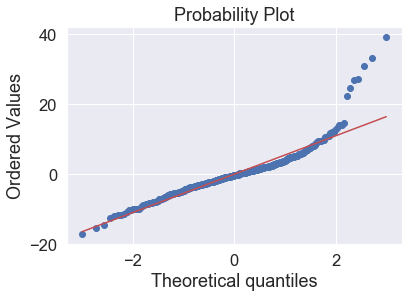

In [53]:

fig, ax = plt.subplots()
stats.probplot(m3.resid, plot=ax)
plt.show()

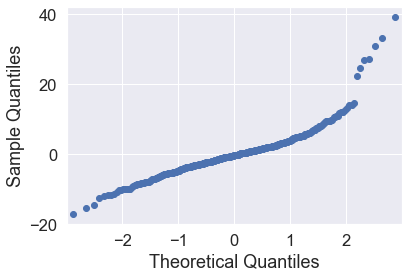

In [54]:
sm.qqplot(m3.resid)
plt.show()

The residuals are (largely) in a normal distribution, except for he aforementioned outliers.

**Part 5, Exercise 3:**  What are some advantages and disadvantages of the fitted vs. residual and quantile plot compared to each other?

The both give a feeling for the distributions. They both show outliers.

**Part 5, Exercise 4:**  Identify any outliers (if any) in your model and write a story describing what these outliers might represent.

The outliers have values above 20. The scatter plots show that here are 7 of these.

In [55]:
bos['RESIDUALS'] = m3.resid

outliers = bos[bos.RESIDUALS > 20]

outliers

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,PRICE,PRED_PRICE,RESIDUALS
365,4.55587,0.0,18.1,0.0,0.718,3.561,87.9,1.6132,24.0,666.0,20.2,354.70,7.12,27.5,14.281907,27.127667
367,13.52220,0.0,18.1,0.0,0.631,3.863,100.0,1.5106,24.0,666.0,20.2,131.42,13.33,23.1,10.831623,22.336529
368,4.89822,0.0,18.1,0.0,0.631,4.970,100.0,1.3325,24.0,666.0,20.2,375.52,3.26,50.0,23.800729,39.298836
369,5.66998,0.0,18.1,1.0,0.631,6.683,96.8,1.3567,24.0,666.0,20.2,375.33,3.73,50.0,32.644074,26.814372
370,6.53876,0.0,18.1,1.0,0.631,7.016,97.5,1.2024,24.0,666.0,20.2,392.05,2.96,50.0,34.606840,24.534761
371,9.23230,0.0,18.1,0.0,0.631,6.216,100.0,1.1691,24.0,666.0,20.2,366.15,9.53,50.0,24.943313,30.991160
372,8.26725,0.0,18.1,1.0,0.668,5.875,89.6,1.1296,24.0,666.0,20.2,347.88,8.88,50.0,25.999809,33.310083


Five of the seven outliers have the highest house price recorded (50). They share the same tax rate, pupil:teacher ratio, and several other factors. They're all in older neighborhoods (88 - 100% built before 1940), and are very close to employment centers.

I would guess that these units have a higher than predicted median price due, not to room size and pupil:teacher ratio, but the oft-quoted most important criteria for real estate: Location, location, location.

**Part 5, Exercise 5:**   Construct a leverage plot and identify high leverage points in the model. Write a story explaining possible reasons for the high leverage points.

An effect leverage plot, also known as added variable plot or partial regression leverage plot, shows the unique effect of a term in the model.
...
You can also use the plot to identify cases that are likely to influence the parameter estimates. Points furthest from the intersection of the horizontal and slanted lines have high leverage, and effectively try to pull the line towards them. A high leverage point that is distant from the bulk of the points can have a large influence the parameter estimates for the term." [ref](https://analyse-it.com/docs/user-guide/fit-model/linear/effect-leverage-plot)

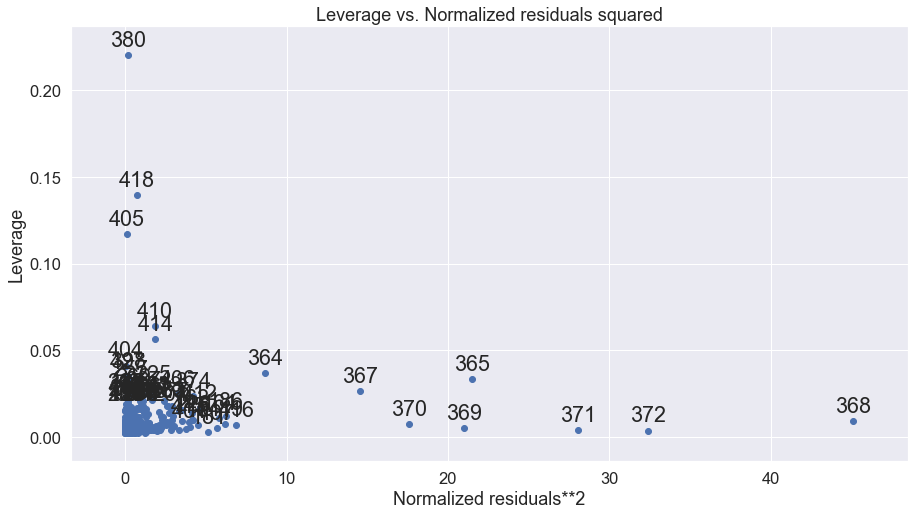

In [56]:
fig = sm.graphics.plot_leverage_resid2(m3)
fig.set_size_inches(15,8)
plt.show()


**Write a story explaining possible reasons for the high leverage points.**

Records 380, 405, and 418 are high leverage points

In [57]:

r1 = bos.iloc[[380, 405, 418]]
r1

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,PRICE,PRED_PRICE,RESIDUALS
380,88.9762,0.0,18.1,0.0,0.671,6.968,91.9,1.4165,24.0,666.0,20.2,396.90,17.21,10.4,14.369948,2.185467
405,67.9208,0.0,18.1,0.0,0.693,5.683,100.0,1.4254,24.0,666.0,20.2,384.97,22.98,5.0,8.211159,1.953763
418,73.5341,0.0,18.1,0.0,0.679,5.957,100.0,1.8026,24.0,666.0,20.2,16.45,20.62,8.8,6.147799,4.882037



These three records correspond to units with approximately 6 rooms, unusually low median prices, and high crime rate.

<Figure size 864x432 with 0 Axes>

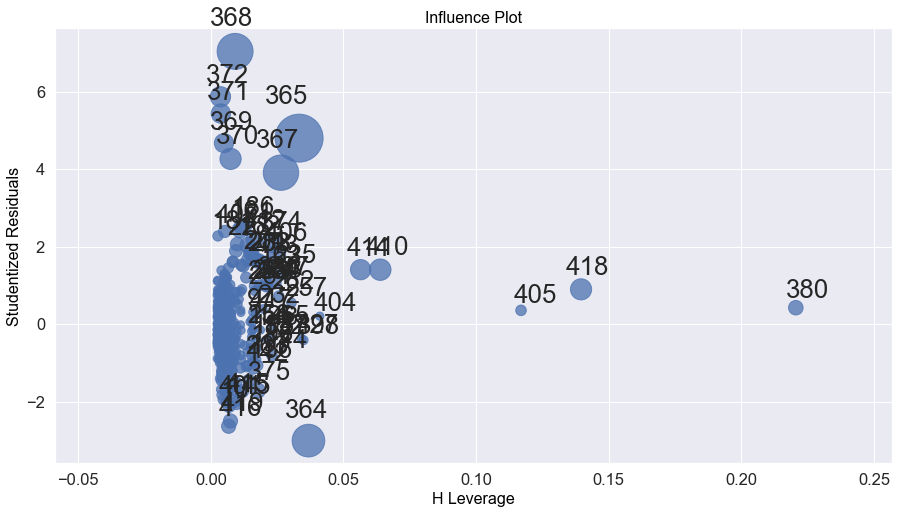

In [59]:
# The influence of each point can be visualized by the criterion keyword argument. 
plt.figure(figsize=(12,6))
fig = sm.graphics.influence_plot(m3, criterion='Cooks')
fig.set_size_inches(15,8)
plt.show()


Observations, 365, 367, and 368 have large influence.

Observations 405, 418, and 380 have high leverage.

**Part 5, Exercise 5:**  Remove the outliers and high leverage points from your model and run the regression again. How do the results change?

References:

- [finding outliers](https://stackoverflow.com/questions/10231206/can-scipy-stats-identify-and-mask-obvious-outliers)
- [outlier_test](https://www.statsmodels.org/stable/generated/statsmodels.regression.linear_model.OLSResults.outlier_test.html)
- [leverage and influence](https://stackoverflow.com/questions/46304514/access-standardized-residuals-cooks-values-hatvalues-leverage-etc-easily-i)
- [Cook's distance](https://en.m.wikipedia.org/wiki/Cook%27s_distance) - "Data points with large residuals (outliers) and/or high leverage may distort the outcome and accuracy of a regression. Cook's distance measures the effect of deleting a given observation. Points with a large Cook's distance are considered to merit closer examination in the analysis."
- [np.argsort](https://docs.scipy.org/doc/numpy/reference/generated/numpy.argsort.html) - "Returns the indices that would sort an array. Perform an indirect sort along the given axis using the algorithm specified by the kind keyword. It returns an array of indices of the same shape as a that index data along the given axis in sorted order."
- [reverse the sort](https://stackoverflow.com/questions/26984414/efficiently-sorting-a-numpy-array-in-descending-order)

In [63]:
m3_out = m3.outlier_test(order=True)

# Choose the top 7 (we can see them on the plots)
top7 = m3_out.nlargest(7, 'student_resid')
outliers = list(top7.index)

outliers

[368, 372, 371, 365, 369, 370, 367]

In [64]:
# leverage points

# create instance of influence
influence = m3.get_influence()

# Cook's (Distance, p-value) as tuple of arrays
(cooks_d, p) = influence.cooks_distance


# By uaing argsort, we not only sort the values, we also replace them in
# the output array by their original index position, which conveniently
# corresponds to an index in our dataset.
# argsort sorts low o high by default; flip to evse order
bos_by_cooks = np.flip(np.argsort(cooks_d))

# Take the top 10 records by size of Cooks' Distance
cooks = list(bos_by_cooks[:10])
cooks.sort()

# Alernatively

# leverage (hat values)
leverage = influence.hat_matrix_diag
bos_by_lev = np.flip(np.argsort(leverage))
lev = list(bos_by_lev[:10])
lev.sort()

print(cooks)
print(lev)

[364, 365, 367, 368, 370, 371, 372, 410, 414, 418]
[364, 365, 380, 398, 404, 405, 410, 414, 418, 427]


The two algorithms produce similar, but no identical, lists. The "hat values" catches record 380.

In [65]:
# Combine chosen ouliers and leverage points into one list
drop_list = set(outliers + cooks + lev) # uniquifies items at add time

drop_list = list(drop_list)
print(drop_list)

[418, 427, 364, 365, 398, 367, 368, 369, 370, 371, 372, 404, 405, 410, 380, 414]


In [73]:
bos2 = bos.drop(bos.index[drop_list])
bos2 = bos2.drop(['PRED_PRICE', 'RESIDUALS'],axis=1)

In [75]:
m3a = ols('PRICE ~ CRIM + RM + PTRATIO', bos2).fit()
m3a.summary()

bos['FITTED'] = m3a.fittedvalues
bos['RESIDUALS'] = m3a.resid

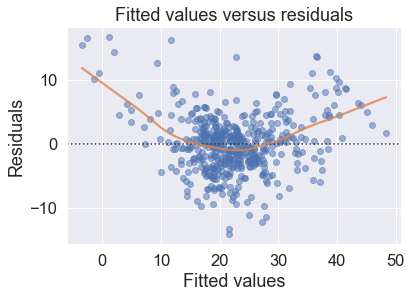

In [76]:
sns.residplot(m3a.fittedvalues, m3a.resid, 
              data=bos2, 
              lowess=True, 
              scatter_kws={'color': 'C0', 'alpha': 0.5},
              line_kws={'color': 'C1', 'alpha': 0.8});
plt.xlabel('Fitted values')
plt.ylabel('Residuals')
plt.title('Fitted values versus residuals')
plt.show()


Fitted vs Residuals has not improved.

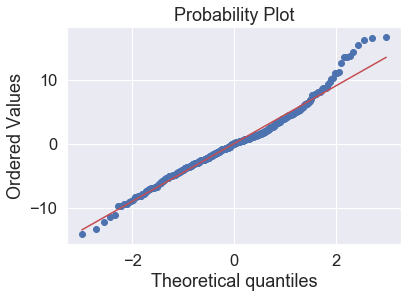

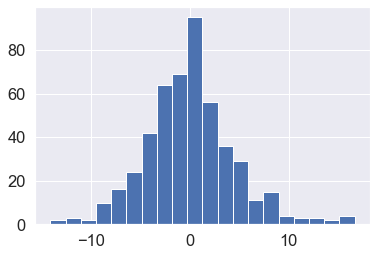

In [77]:

fig, ax = plt.subplots()
stats.probplot(m3a.resid, plot=ax)
plt.show()

plt.hist(m3a.resid, bins=20)
plt.show()

The outliers are gone, so the distribution of residuals is more normal.

In [78]:

print("Original Model")

# Extract the  ð2  statistic.
print('R^2:', m3.rsquared)

# Extract the F statistic
print('F-statistic:', m3.fvalue)
print('F-pvalue', m3.f_pvalue)

print("\nAfter removing outliers")

# Extract the  ð2  statistic.
print('R^2:', m3a.rsquared)

# Extract the F statistic
print('F-statistic:', m3a.fvalue)
print('F-pvalue', m3a.f_pvalue)

print("\nComparison")

# Compute the F -test comparing the two models 
# (before and after removing outliers, etc)
rss_before = m3.ssr
rss_after = m3a.ssr
df_before = m3.df_resid
df_after = m3a.df_resid
f = ((rss_before - rss_after)/(df_before - df_after))/(rss_after/df_after)
print('F-statistic is:', f)

# extract AIC's
print("AIC - before:", m3.aic, "\nAIC - after:", m3a.aic)
print("AIC (Difference):", (m3.aic - m3a.aic))

Original Model
R^2: 0.5943412940723473
F-statistic: 245.1644903006464
F-pvalue 6.150435026236667e-98

After removing outliers
R^2: 0.7293751788563922
F-statistic: 436.61471433189155
F-pvalue 1.7501129774435082e-137

Comparison
F-statistic is: 21.71798867736988
AIC - before: 3231.9451235449956 
AIC - after: 2881.4353938279573
AIC (Difference): 350.5097297170382


By removing the outliers and highest leverage points, the model has improved:

- R^2 increased from 0.594 to 0.729.
- The F-statistic nearly doubled from 245 to 437
- The f-pvalue is smaller
- The AIC dropped from 3232 to 2881.

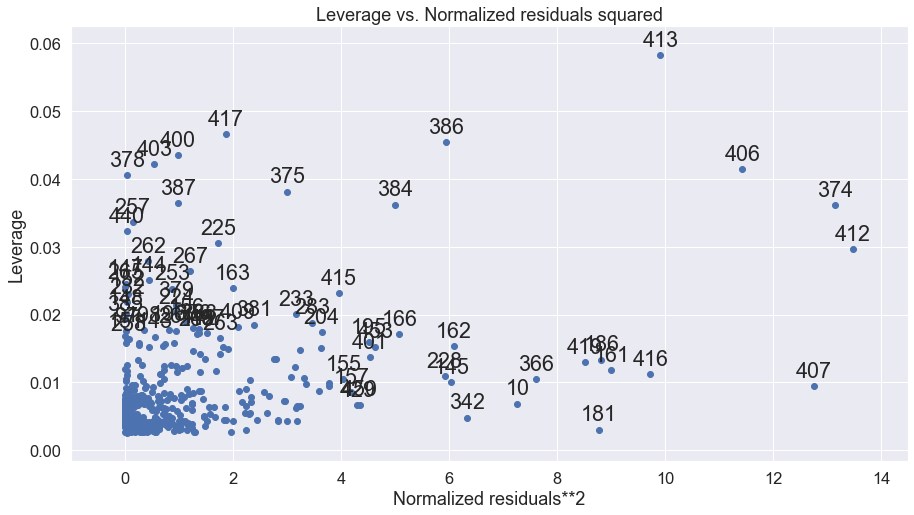

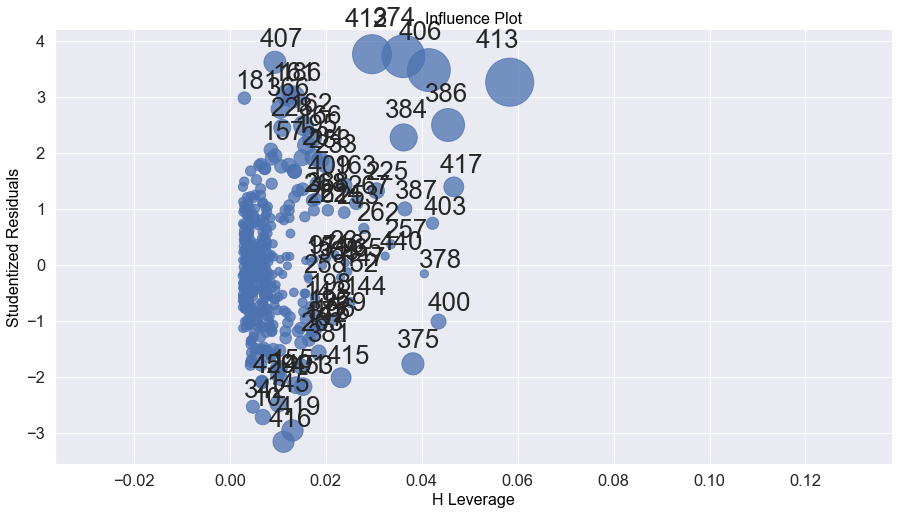

In [79]:
fig = sm.graphics.plot_leverage_resid2(m3a)
fig.set_size_inches(15,8)
plt.show()

fig = sm.graphics.influence_plot(m3a, criterion='Cooks')
fig.set_size_inches(15,8)
plt.show()
